# Proyek Analisis Data: Bike sharing dataset
- **Nama:** Dimas Narendra Putra
- **Email:** dimasnarendraputra@gmail.com
- **ID Dicoding:** dimas_narendra_putra_OgVZ



## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : how does temprature and humidity impact rentals (apakah temprature dan humidity berimpact ke jumlah rental)
- Pertanyaan 2 : is it that significant the difference in rent on weekend vs weekdays (apakah perbedaan rental apada weekend dan weekdays itu signifikan)

## Import Semua Packages/Library yang Digunakan

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [47]:
hour_df = pd.read_csv('Bike-sharing-dataset\day.csv')
hour_df.head()


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\dimas\AppData\Local\Temp\ipykernel_42536\3670441962.py:1: SyntaxWarning: invalid escape sequence '\d'
  hour_df = pd.read_csv('Bike-sharing-dataset\day.csv')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [48]:
day_df = pd.read_csv('Bike-sharing-dataset\hour.csv')
hour_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\dimas\AppData\Local\Temp\ipykernel_42536\1842650618.py:1: SyntaxWarning: invalid escape sequence '\h'
  day_df = pd.read_csv('Bike-sharing-dataset\hour.csv')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Table 1 = day_df yang berisikan data rental bike per day yang mempunyai 16 column
- Table 2 = hour_df yang berisikan data rental bike per hour yang mempunyai 16 column

### Assessing Data

menilai table day_df

In [49]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [50]:
#describe tabel
day_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Menilai Table hour_df

In [51]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [52]:
#describe tabel
hour_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- xxx
- xxx

### Cleaning Data

In [53]:
#cek Duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [54]:
#cek Duplikasi
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [55]:
#cek apakah ada yang null
print("Data Null:")
print(day_df.isnull().sum())

Data Null:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [56]:
#cek apakah ada yang null
print("Data Null:")
print(hour_df.isnull().sum())

Data Null:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [57]:
#check apakah semua data in range yang sesuai dengan read me txt
def check_column_range(df, column_name, valid_range):
    invalid_values = df[~df[column_name].isin(valid_range)]
    if not invalid_values.empty:
        print(f"Invalid values in {column_name}:")
        print(invalid_values[[column_name]])
    else:
        print(f"{column_name}: All clear")
#cek outliers di temprature,temperature
def check_outliers(df, column_name):
    outliers = df[(df[column_name] < 0) | (df[column_name] > 1)]
    if not outliers.empty:
        print(f"Outliers in {column_name}:")
        print(outliers[[column_name]])
    else:
        print(f"{column_name}: All clear")

#cek jika ada data yang negative
rental_columns = ['casual', 'registered', 'cnt']

for col in rental_columns:
    negative_rentals = hour_df[hour_df[col] < 0]
    if not negative_rentals.empty:
        print(f"Negative values in {col}:")
        print(negative_rentals[[col]])
    else:
        print(f"{col}: All clear")


casual: All clear
registered: All clear
cnt: All clear


In [58]:
#cek data di hour
check_column_range(hour_df, 'season', range(1, 5))
check_column_range(hour_df, 'yr', [0, 1])
check_column_range(hour_df, 'mnth', range(1, 13))
check_column_range(hour_df, 'holiday', [0, 1])
check_column_range(hour_df, 'workingday', [0, 1])
check_column_range(hour_df, 'weathersit', range(1, 5))
#cek data di day
check_column_range(day_df, 'season', range(1, 5))
check_column_range(day_df, 'yr', [0, 1])
check_column_range(day_df, 'mnth', range(1, 13))
check_column_range(day_df, 'hr', range(0, 24))
check_column_range(day_df, 'holiday', [0, 1])
check_column_range(day_df, 'workingday', [0, 1])
check_column_range(day_df, 'weathersit', range(1, 5))

season: All clear
yr: All clear
mnth: All clear
holiday: All clear
workingday: All clear
weathersit: All clear
season: All clear
yr: All clear
mnth: All clear
hr: All clear
holiday: All clear
workingday: All clear
weathersit: All clear


**Insight:**
- tabel 1 : berbasis dari pengecekan diatas semua data pada tabel tidak ada yang null maupun duplikasi,serta semua data sudah sesuai dengan data yang ada di read me
- tabel 2 : sama seperti tabel yang pertama semua data pada tabel tidak ada yang null, duplikasi dan semua range data sesuai dengan read me

## Exploratory Data Analysis (EDA)

### cek outliers dan general distribution dari weather (temperature,humidity)

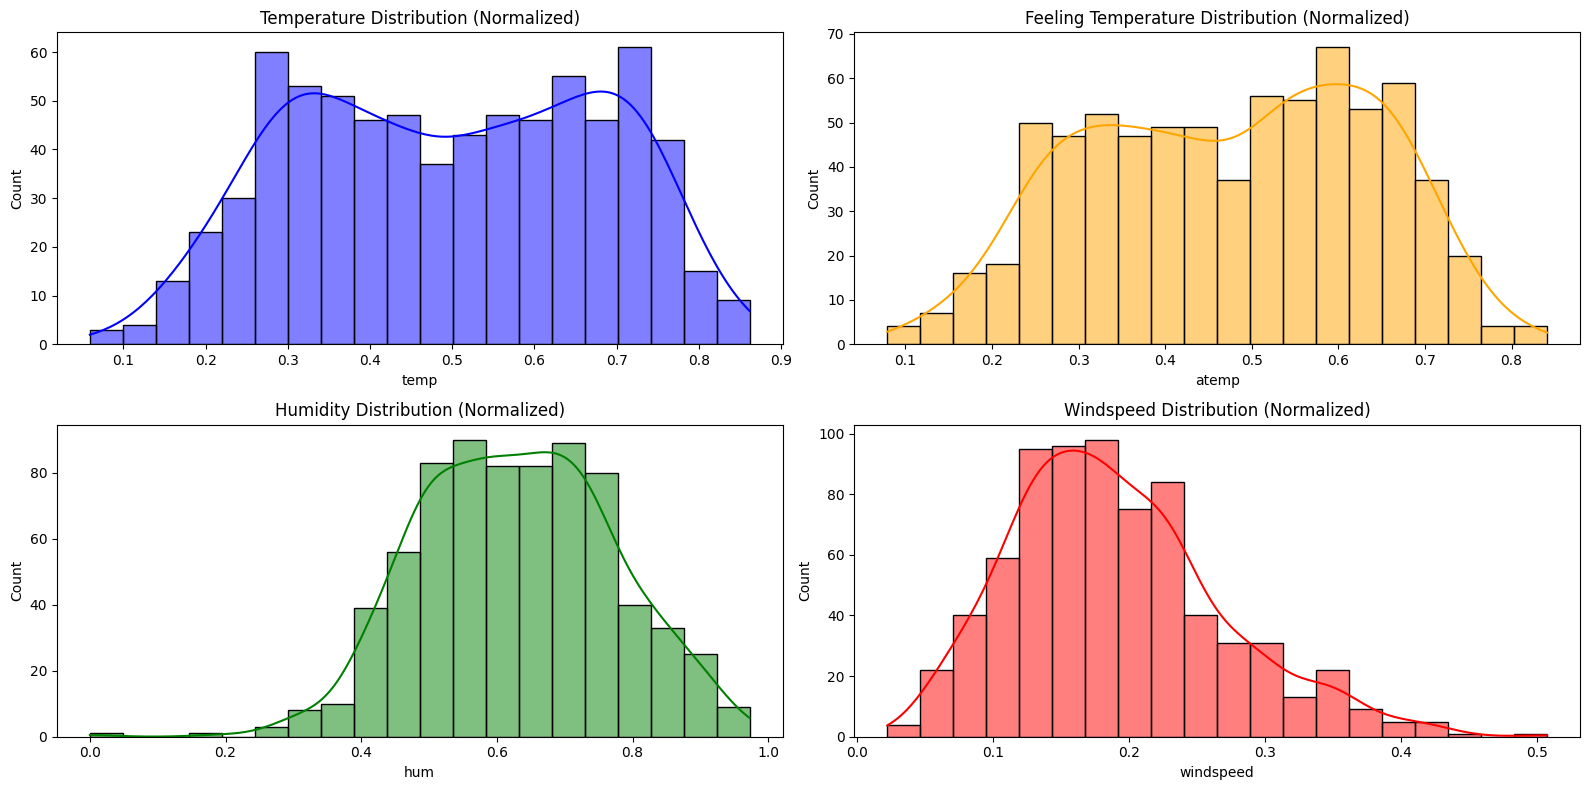

In [59]:
plt.figure(figsize=(16, 8))

# Temperature
plt.subplot(2, 2, 1)
sns.histplot(hour_df['temp'], kde=True, bins=20, color='blue')
plt.title('Temperature Distribution (Normalized)')

# Feeling Temperature
plt.subplot(2, 2, 2)
sns.histplot(hour_df['atemp'], kde=True, bins=20, color='orange')
plt.title('Feeling Temperature Distribution (Normalized)')

# Humidity
plt.subplot(2, 2, 3)
sns.histplot(hour_df['hum'], kde=True, bins=20, color='green')
plt.title('Humidity Distribution (Normalized)')

# Windspeed
plt.subplot(2, 2, 4)
sns.histplot(hour_df['windspeed'], kde=True, bins=20, color='red')
plt.title('Windspeed Distribution (Normalized)')

plt.tight_layout()
plt.show()


### cek distribusi bagi pesepeda casual, regitered, dan cnt

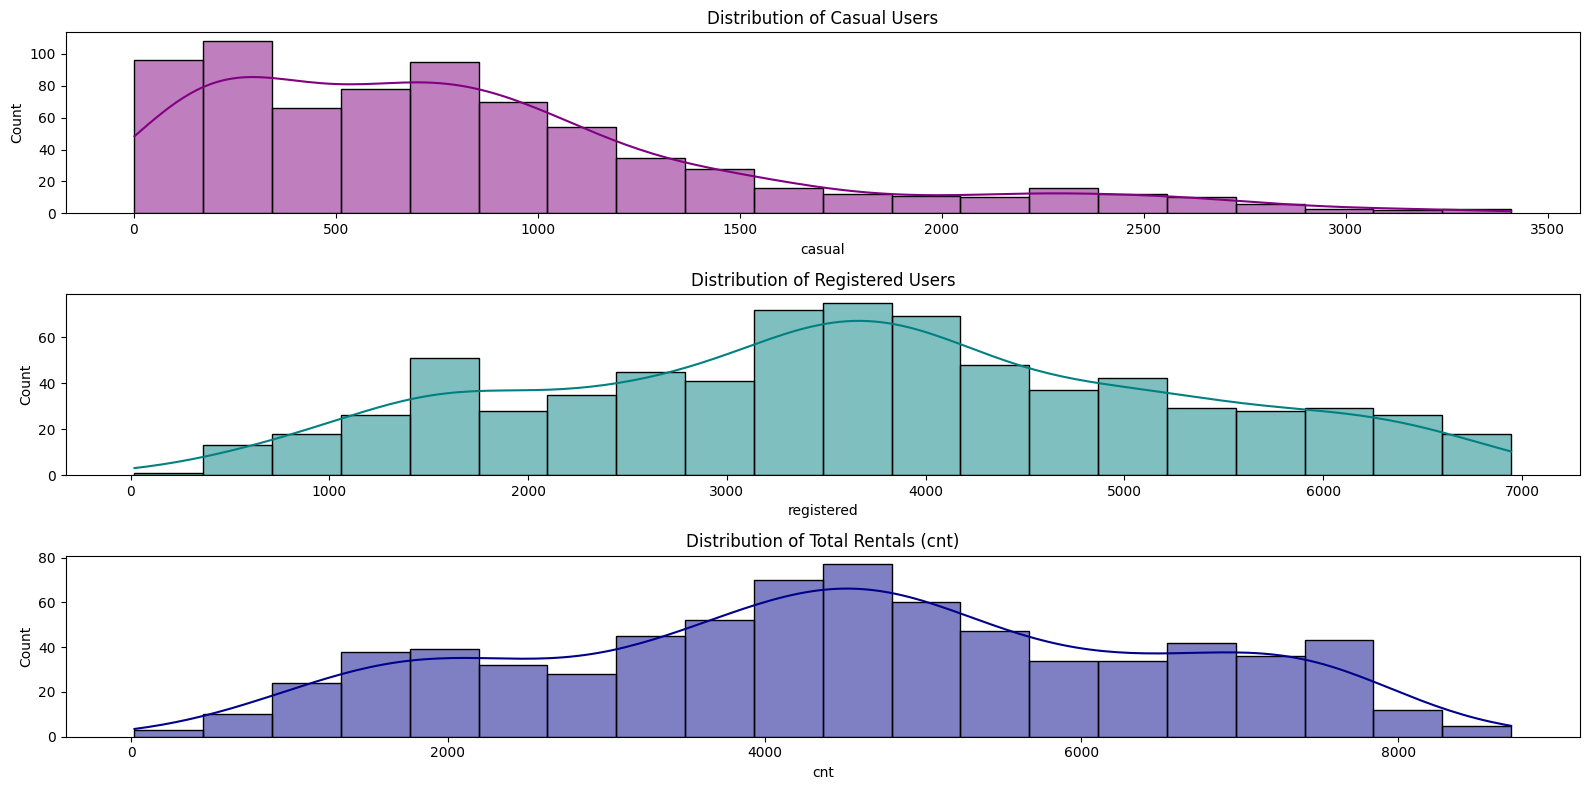

In [60]:
plt.figure(figsize=(16, 8))

# Casual users
plt.subplot(3, 1, 1)
sns.histplot(hour_df['casual'], kde=True, bins=20, color='purple')
plt.title('Distribution of Casual Users')

# Registered users
plt.subplot(3, 1, 2)
sns.histplot(hour_df['registered'], kde=True, bins=20, color='teal')
plt.title('Distribution of Registered Users')

# Total rentals (cnt)
plt.subplot(3, 1, 3)
sns.histplot(hour_df['cnt'], kde=True, bins=20, color='darkblue')
plt.title('Distribution of Total Rentals (cnt)')

plt.tight_layout()
plt.show()

### Cek rata" rental bike per season

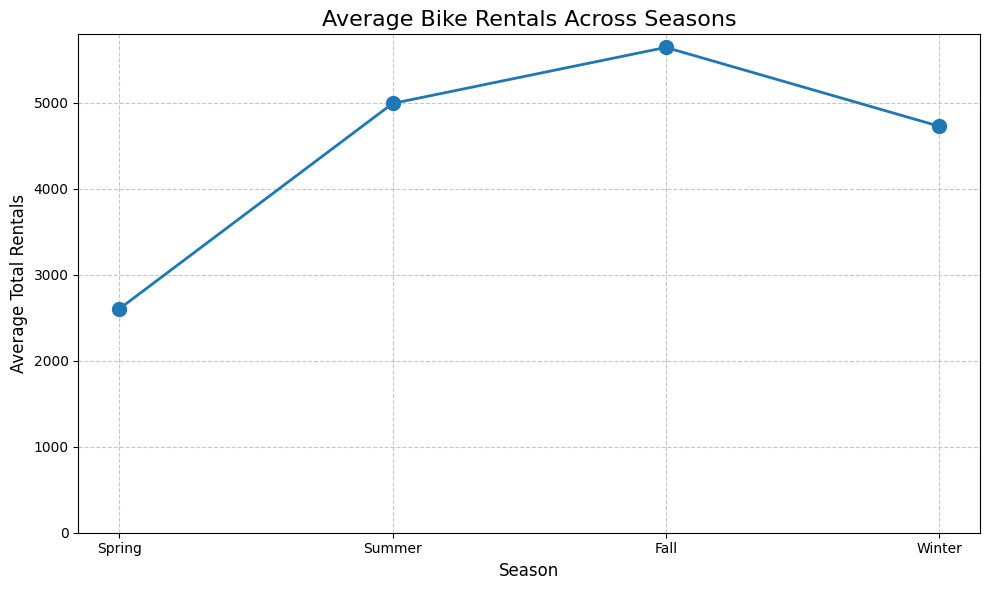

In [61]:
season_avg = hour_df.groupby('season')['cnt'].mean().reset_index()

season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_avg['season_name'] = season_avg['season'].map(season_names)

season_avg = season_avg.sort_values('season')

plt.figure(figsize=(10, 6))
plt.plot(season_avg['season_name'], season_avg['cnt'], marker='o', linewidth=2, markersize=10)

plt.title('Average Bike Rentals Across Seasons', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Total Rentals', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

### cek berapa rental rental per jam

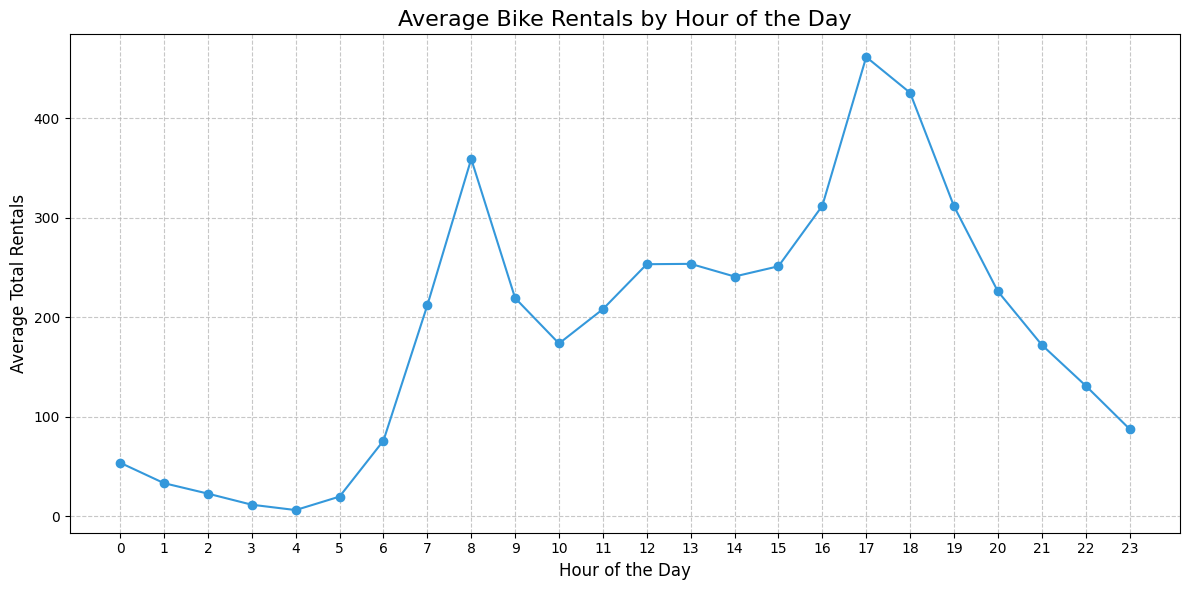

In [62]:
hourly_stats = day_df.groupby('hr')['cnt'].agg(['mean', 'sem']).reset_index()


plt.figure(figsize=(12, 6))


plt.plot(hourly_stats['hr'], hourly_stats['mean'], marker='o', linestyle='-', color='#3498db')


plt.title('Average Bike Rentals by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Total Rentals', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Insight:**
- yang menarik menurut saya dari exploratory ini iyalah season kering seperti spring rentnya lebih sedikit dibanding winter 
- lalu untuk pemakaian sepeda berbanding dengan jam menurut saya sangat wajar dikarenakan jam rush hour banyak orng yang meminjam sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: how does temprature and humidity impact rentals (apakah temprature dan humidity berimpact ke jumlah rental)


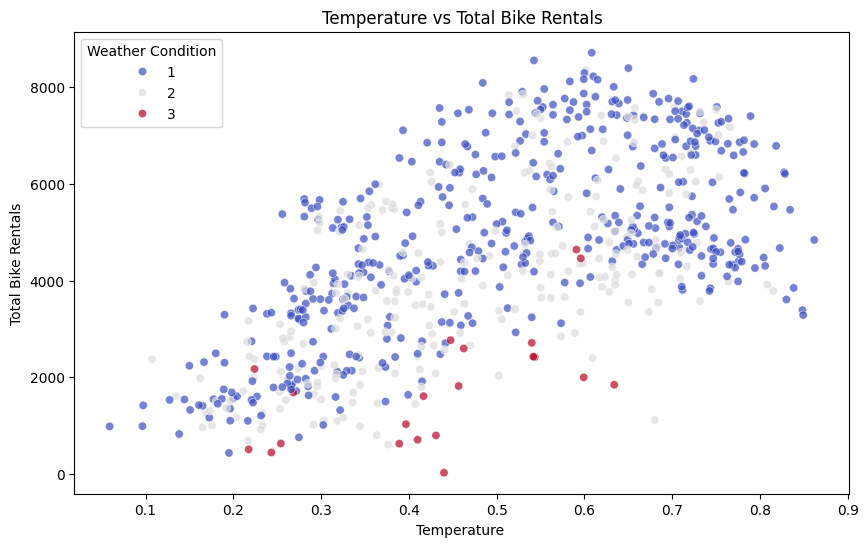

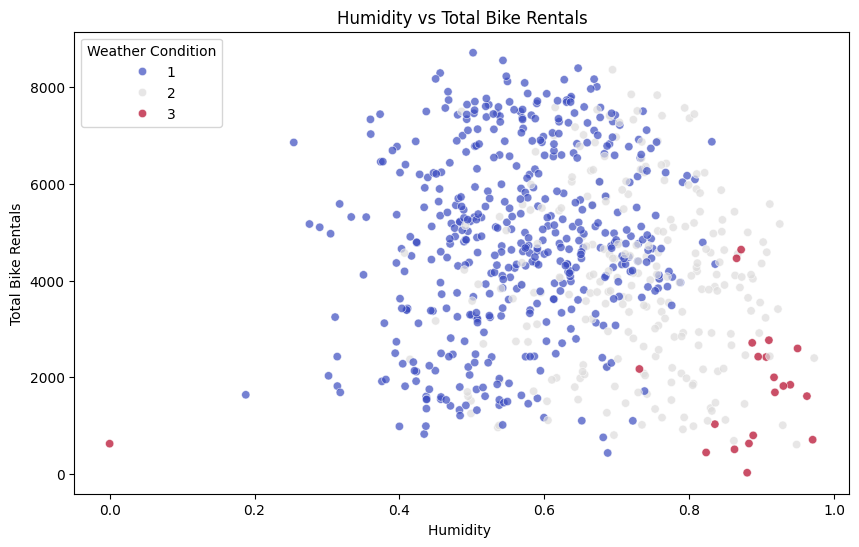

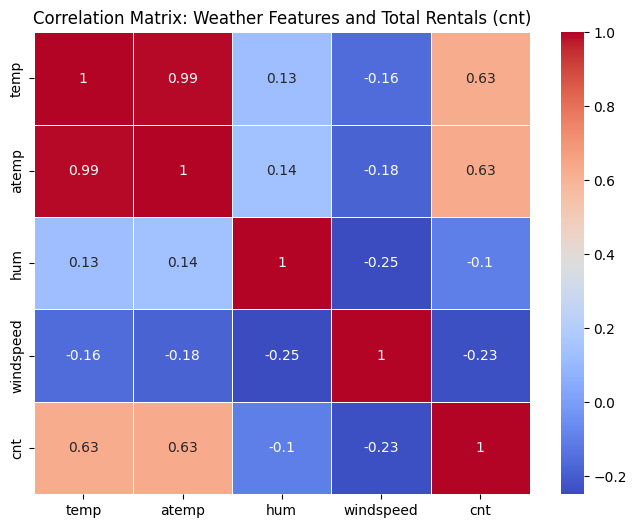

In [63]:
# Temperature vs. Total Rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_df, hue='weathersit', palette='coolwarm', alpha=0.7)
plt.title('Temperature vs Total Bike Rentals')
plt.xlabel('Temperature ')
plt.ylabel('Total Bike Rentals')
plt.legend(title='Weather Condition', loc='upper left')
plt.show()

# Humidity vs. Total Rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=hour_df, hue='weathersit', palette='coolwarm', alpha=0.7)
plt.title('Humidity vs Total Bike Rentals')
plt.xlabel('Humidity ')
plt.ylabel('Total Bike Rentals')
plt.legend(title='Weather Condition', loc='upper left')
plt.show()

# Correlation Heatmap for Weather and Rentals
weather_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation_matrix = hour_df[weather_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Weather Features and Total Rentals (cnt)')
plt.show()

### Pertanyaan 2:is it that significant the difference in rent on weekend vs weekdays (apakah perbedaan rental apada weekend dan weekdays itu signifikan)

C:\Users\dimas\AppData\Local\Temp\ipykernel_42536\4125353377.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='cnt', data=avg_rentals, palette='Set2')


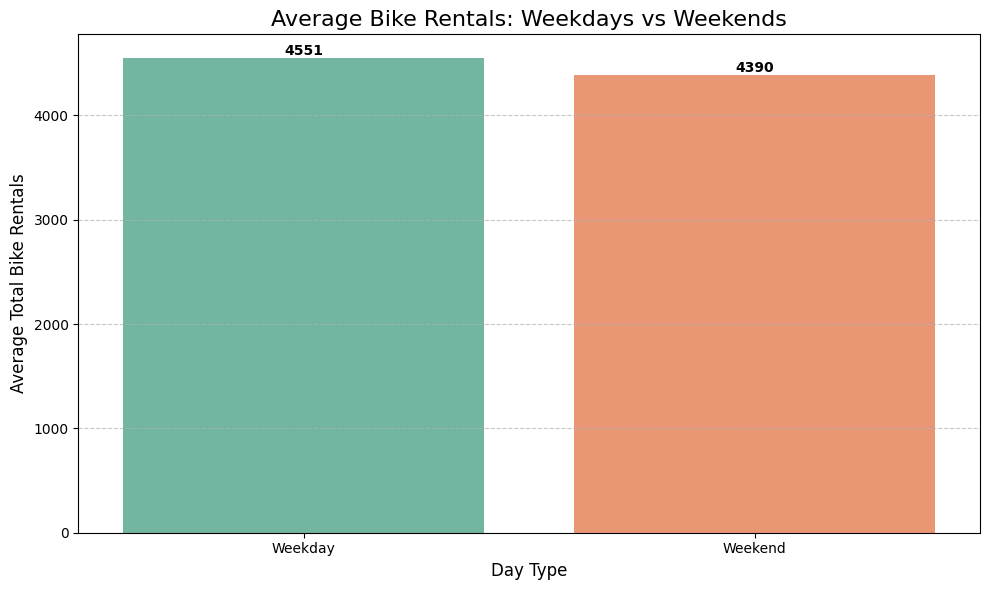

In [64]:
hour_df['is_weekend'] = hour_df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)
avg_rentals = hour_df.groupby('is_weekend')['cnt'].mean().reset_index()
avg_rentals['day_type'] = avg_rentals['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})


plt.figure(figsize=(10, 6))
sns.barplot(x='day_type', y='cnt', data=avg_rentals, palette='Set2')


plt.title('Average Bike Rentals: Weekdays vs Weekends', fontsize=16)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Average Total Bike Rentals', fontsize=12)

# Add value labels on top of each bar
for i, v in enumerate(avg_rentals['cnt']):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom', fontweight='bold')


plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- pada table 1 saya melakukan 2 heatmap dengan temp dan humidity lalu cari korelasi dibanding dengan temp,atemo,humid,windspeedn dan count
- pada table 2 saya bandingka rata" 

## Analisis Lanjutan (Opsional)

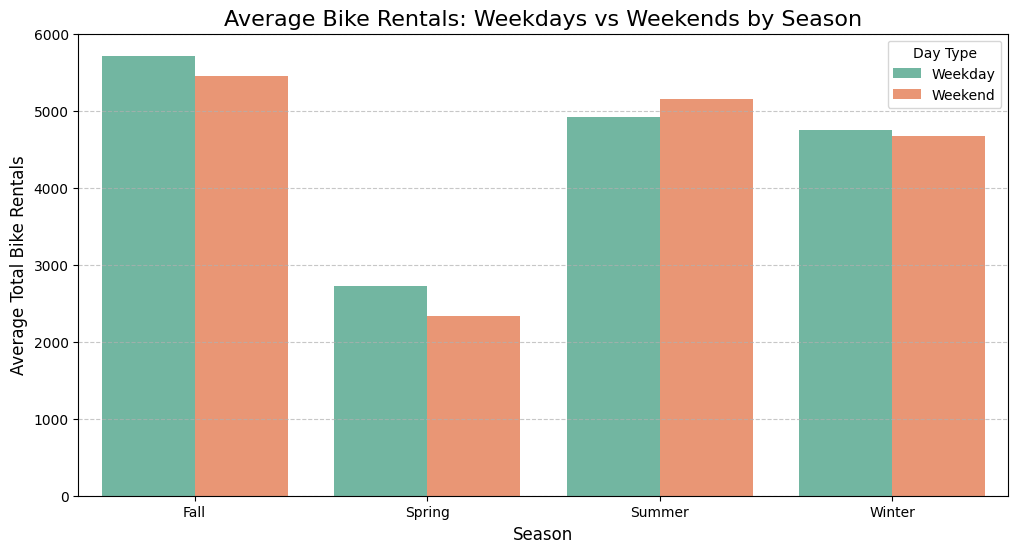

In [65]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season_name'] = hour_df['season'].map(season_map)

avg_rentals = hour_df.groupby(['season_name', 'is_weekend'])['cnt'].mean().reset_index()
avg_rentals['day_type'] = avg_rentals['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})
# Create the grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='season_name', y='cnt', hue='day_type', data=avg_rentals, palette='Set2')

# Customize the plot
plt.title('Average Bike Rentals: Weekdays vs Weekends by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Total Bike Rentals', fontsize=12)
plt.legend(title='Day Type')

# Adjust y-axis to start from 0
plt.ylim(bottom=0)

# Add a grid for easier comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot

plt.show()

In [66]:
df1 = pd.read_csv("Bike-sharing-dataset\day.csv")  
df2 = pd.read_csv("Bike-sharing-dataset\hour.csv")  

all_df = pd.concat([df1, df2], ignore_index=True)


all_df.to_csv("all_data.csv", index=False)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\dimas\AppData\Local\Temp\ipykernel_42536\536807402.py:1: SyntaxWarning: invalid escape sequence '\d'
  df1 = pd.read_csv("Bike-sharing-dataset\day.csv")
C:\Users\dimas\AppData\Local\Temp\ipykernel_42536\536807402.py:2: SyntaxWarning: invalid escape sequence '\h'
  df2 = pd.read_csv("Bike-sharing-dataset\hour.csv")


saya buat ini karena rasa penasaran saya untuk membandingkan data weekend vs weekdays tpi di setiap season apakah ada perbedaan dan ternyata hampir semua season weekdays lebih banyak dipakai kecuali pada summer yang saya perkirakan karena summer banyak libur dan orang" lebih suka menghabiskan liburnya diluar karena weather yang mendukung dan ingin mencoba sepeda


## Conclusion

- Conclution pertanyaan 1 : dari sekian kondisi cuaca seperti temp,humidity,windspeed dll yang ternyata memiliki impact pada rent ialah   temperature
- Conclution pertanyaan 2 : perbandingan weekend vs weekdays ternyata tidak sesignifikan yang saya kira, bahkan dari analisa lain dari ke 4 musim 3 musim lebih banyak pemakai saat weekdays dibanding dengan weekend 